In [2]:
!pip install --upgrade numexpr bottleneck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 7.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.7
    Uninstalling numexpr-2.8.7:
      Successfully uninstalled numexpr-2.8.7
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.7
    Uninstalling Bottleneck-1.3.7:
      Successfully uninstalled Bottleneck-1.3.7


In [30]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
# Load iris dataset
iris = load_iris()

In [3]:
X = iris.data
Y = iris.target

In [4]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['Species'] = Y

In [5]:
df['Species'].nunique()

3

### We have 3 classes (target)
### Converting into two classes by droping target '0'

In [6]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]

In [7]:
df['Species'].nunique()

2

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

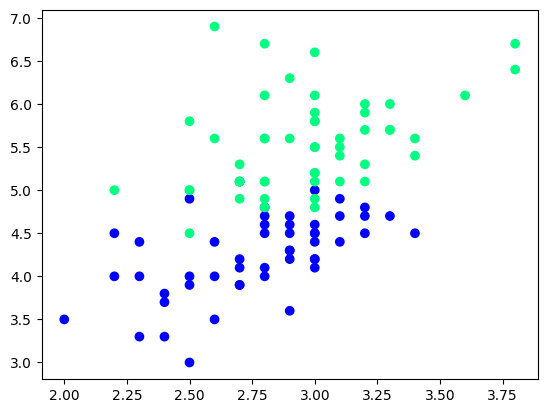

In [9]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['Species'], cmap='winter')

In [10]:
df.sample(5)

,sepal width (cm),petal length (cm),Species
66,3.0,4.5,1
90,2.6,4.4,1
114,2.8,5.1,2
102,3.0,5.9,2
139,3.1,5.4,2


In [11]:
# Taking 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:100].sample(5)

In [12]:
df_train

,sepal width (cm),petal length (cm),Species
118,2.6,6.9,2
66,3.0,4.5,1
143,3.2,5.9,2
124,3.3,5.7,2
67,2.7,4.1,1
82,2.7,3.9,1
97,2.9,4.3,1
89,2.5,4.0,1
87,2.3,4.4,1
139,3.1,5.4,2


In [13]:
df_val

,sepal width (cm),petal length (cm),Species
134,2.6,5.6,2
63,2.9,4.7,1
117,3.8,6.7,2
127,3.0,4.9,2
83,2.7,5.1,1


In [14]:
df_test

,sepal width (cm),petal length (cm),Species
98,2.5,3.0,1
90,2.6,4.4,1
114,2.8,5.1,2
69,2.5,3.9,1
126,2.8,4.8,2


In [15]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:, -1].values

In [16]:
y_test

array([2, 1, 2, 2, 1])

# Case: 1 - Bagging

In [17]:
# Data for Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal width (cm),petal length (cm),Species
89,2.5,4.0,1
143,3.2,5.9,2
124,3.3,5.7,2
143,3.2,5.9,2
82,2.7,3.9,1
124,3.3,5.7,2
124,3.3,5.7,2
139,3.1,5.4,2


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_scorebag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

In [19]:
dt_bag1 = DecisionTreeClassifier()

In [20]:
def evaluate(clf, X, y):
    clf.fit(X.values, y.values)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

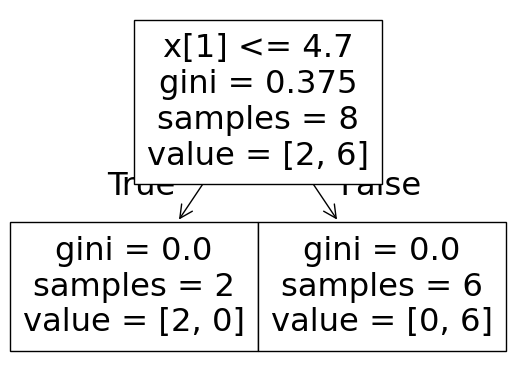

0.8


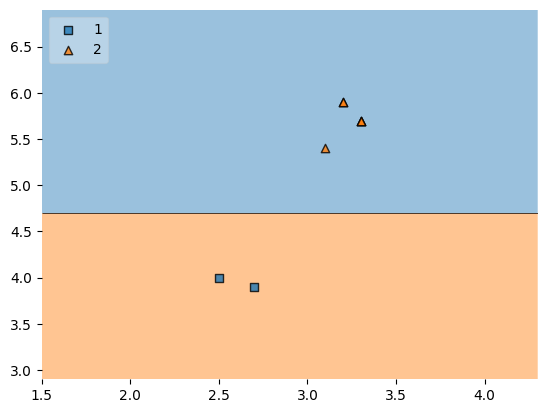

In [21]:
evaluate(dt_bag1, X, y)

In [22]:
# Data for tree 2
df_bag = df_train.sample(8, replace=True)

# Fetch X and y
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
139,3.1,5.4,2
87,2.3,4.4,1
67,2.7,4.1,1
124,3.3,5.7,2
66,3.0,4.5,1
97,2.9,4.3,1
97,2.9,4.3,1
89,2.5,4.0,1


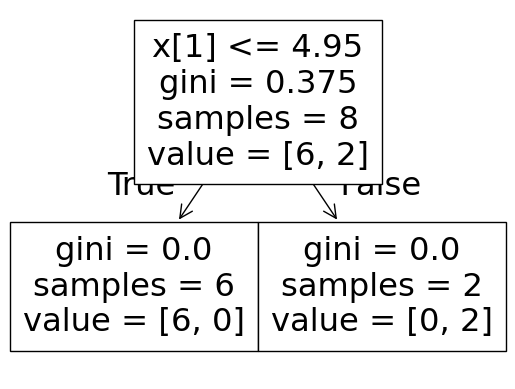

0.6


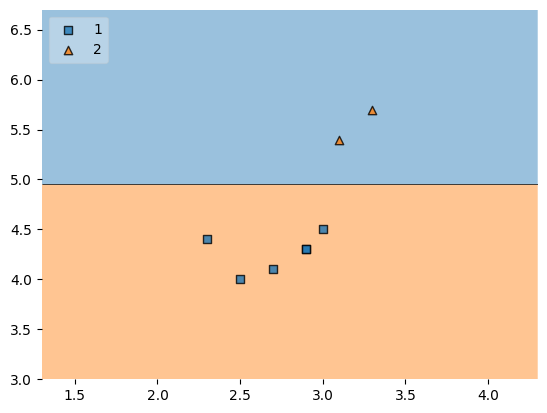

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [25]:
# Data for Tree 3
df_bag = df_train.sample(8, replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:, -1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
89,2.5,4.0,1
124,3.3,5.7,2
97,2.9,4.3,1
66,3.0,4.5,1
118,2.6,6.9,2
87,2.3,4.4,1
118,2.6,6.9,2
87,2.3,4.4,1


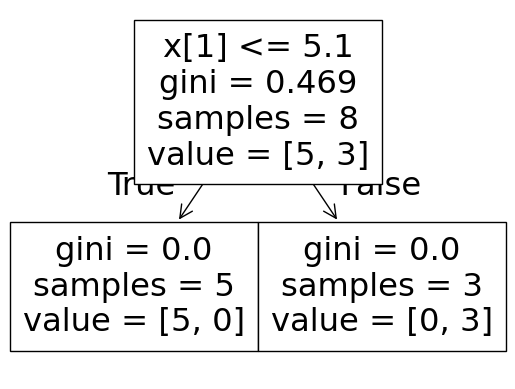

0.8


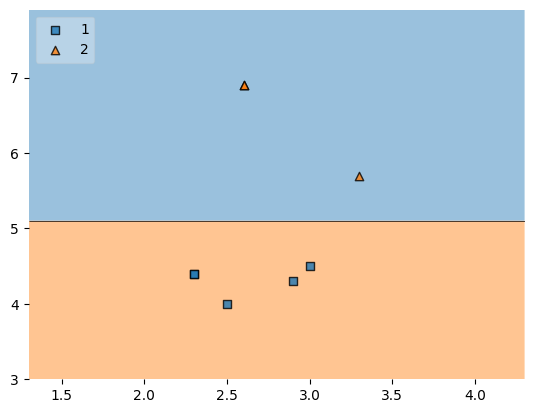

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

In [27]:
df_test

,sepal width (cm),petal length (cm),Species
98,2.5,3.0,1
90,2.6,4.4,1
114,2.8,5.1,2
69,2.5,3.9,1
126,2.8,4.8,2


In [31]:
print("Predictor 1", dt_bag1.predict(np.array([2.6, 4.4]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.6, 4.4]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([2.6, 4.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


# Pasting
#### Row sampling without replacement

# Comparing single model with bagging


In [32]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [33]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Single model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy: ", accuracy_score(y_test, y_pred))

Decision Tree accuracy:  0.936


# Bagging

In [38]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500, # 500 different Decision Trees.
    max_samples=0.5, # each tree only gets a random 50% (0.5) of the data.
    bootstrap=True, # means samples are drawn with replacement.
    random_state=42
)

In [39]:
bag.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeClassifier()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",500
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",0.5
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",True
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",0


In [40]:
y_pred = bag.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.951

### Here the accuracy increases when bagging is used

In [45]:
bag.estimators_samples_[0].shape

(4000,)

In [48]:
bag.estimators_features_[0].shape

(10,)

# Bagging using SVM

In [50]:
bag = BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Bagging with SVM accuracy: ", accuracy_score(y_test, y_pred))

Bagging with SVM accuracy:  0.9445


# Pasting
#### Row sampling without replacement

In [53]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False, # False means without replacement
    random_state=42,
    verbose = 1, # Prints progress updates (that's the message you see).
    n_jobs = -1 # Use all CPU cores
)    

In [54]:
bag.fit(X_train, y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.4s remaining:   12.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.7s finished


,"estimator estimator: object, default=NoneThe base estimator to fit on random subsets of the dataset.If None, then the base estimator is a:class:`~sklearn.tree.DecisionTreeClassifier`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",DecisionTreeClassifier()
,"n_estimators n_estimators: int, default=10The number of base estimators in the ensemble.",500
,"max_samples max_samples: int or float, default=NoneThe number of samples to draw from X to train each base estimator (withreplacement by default, see `bootstrap` for more details).- If None, then draw `X.shape[0]` samples irrespective of `sample_weight`.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` unweighted samples or `max_samples * sample_weight.sum()` weighted samples.",0.25
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator (without replacement by default, see `bootstrap_features` for moredetails).- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.",1.0
,"bootstrap bootstrap: bool, default=TrueWhether samples are drawn with replacement. If False, sampling withoutreplacement is performed. If fitting with `sample_weight`, it isstrongly recommended to choose True, as only drawing with replacementwill ensure the expected frequency semantics of `sample_weight`.",False
,"bootstrap_features bootstrap_features: bool, default=FalseWhether features are drawn with replacement.",False
,"oob_score oob_score: bool, default=FalseWhether to use out-of-bag samples to estimatethe generalization error. Only available if bootstrap=True.",False
,"warm_start warm_start: bool, default=FalseWhen set to True, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fita whole new ensemble. See :term:`the Glossary `... versionadded:: 0.17 *warm_start* constructor parameter.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for both :meth:`fit` and:meth:`predict`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random resampling of the original dataset(sample wise and feature wise).If the base estimator accepts a `random_state` attribute, a differentseed is generated for each instance in the ensemble.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity when fitting and predicting.",1


In [56]:
y_pred = bag.predict(X_test)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.1s finished


In [58]:
print("Pasting classifier accuracy", accuracy_score(y_test, y_pred))

Pasting classifier accuracy 0.9505


# Random Subspaces
#### The Random Subspace Method is an ensemble technique where:
#### Each model is trained using a random subset of features (not samples).

#### So instead of randomly sampling rows (like Bagging), we randomly sample columns (features).

In [59]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Base model: each learner is a decision tree
    n_estimators=500, # Number of trees in the ensemble
    max_samples=1.0, # Use 100% of training samples for each tree
    bootstrap=False, # No row sampling with replacement (no classic bagging)
    max_features=0.5,  # Each tree sees only 50% of the features
    bootstrap_features=True, # Feature sampling is done WITH replacement
    random_state=42  # For reproducibility (same random splits every run)
)

In [62]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Random Subspace Classifier accuracy:", accuracy_score(y_test, y_pred))

Random Subspace Classifier accuracy: 0.9485


In [64]:
bag.estimators_samples_[0].shape

(8000,)

In [65]:
bag.estimators_features_[0].shape

(5,)

# Random Patches
#### Random Patches is an ensemble method where:
#### Each base learner is trained on a random subset of samples AND a random subset of features.

#### So it combines:
<ul>
    <li>Row sampling (like Bagging)</li>
    <li>Feature sampling (like Random Subspace)</li>
</ul>

---

## Why Random Patches?
#### Because: If all trees see:
<ul>
    <li>Same rows</li>
    <li>Same features</li>
</ul>

#### They become similar.
#### Random Patches increases:
<ul>
    <li>Diversity</li>
    <li>Reduces correlation</li>
    <li>Improves generalization</li>
</ul>


In [66]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25, # 50% of rows to each base model
    bootstrap=True, # Sample rows with replacement
    max_features=0.5, # 50% of feature to each base model
    bootstrap_features=True, # sample feature with replacement
    random_state=42
)

In [67]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9445
